In [5]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



train_x = torch.tensor([[1.0], [0.0]]).reshape(-1,1)
train_y = torch.tensor([[0.0], [1.0]]).reshape(-1,1)


In [6]:

class NOTOperatorModel:
    def __init__(self):
        self.W = torch.rand((1,1), requires_grad=True)
        self.b = torch.rand((1,1), requires_grad=True)
    # Predictor
    def f(self, x):
        return torch.sigmoid(self.logits(x))
    
    def logits(self, x):
        return x @ self.W + self.b

    def loss(self, x, y):
        return torch.nn.functional.binary_cross_entropy_with_logits(self.logits(x),y)


In [7]:

model = NOTOperatorModel()

optimizer = torch.optim.SGD([model.b, model.W], lr=0.1)
for epoch in range(250000):
    model.loss(train_x, train_y).backward() 
    optimizer.step() 
    optimizer.zero_grad()  

print("W = %s, b = %s, loss = %s" %(model.W, model.b, model.loss(train_x, train_y)))

W = tensor([[-17.0665]], requires_grad=True), b = tensor([[8.3305]], requires_grad=True), loss = tensor(0.0002, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)


RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x100 and 1x1)

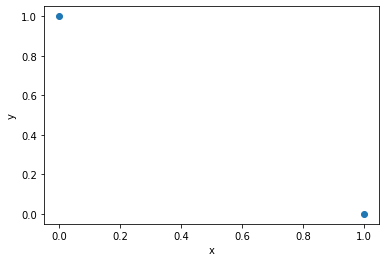

In [8]:


plt.plot(train_x, train_y, 'o', label='$(x^{(i)},y^{(i)})$')
plt.xlabel('x')
plt.ylabel('y')
x = torch.tensor([[torch.min(train_x)], [torch.max(train_x)]])
x = torch.arange(0.0,1.0, 0.01).reshape(-1,1)
plt.plot(x, model.f(x).detach(), label='$\\hat y = f(x) = xW+b$')
plt.legend()
plt.show()
